In [1]:
import pandas as pd
from pandas import to_datetime

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('202302-citibike-tripdata.csv', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752148 entries, 0 to 1752147
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 173.8+ MB


In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,16991A7C313082EB,classic_bike,2023-02-16 18:20:42,2023-02-16 18:38:06,Kosciuszko St & Nostrand Ave,4519.04,Eastern Pkwy & Troy Ave,3862.07,40.690698,-73.951423,40.669290,-73.936790,casual
1,856FFB566BEEB824,classic_bike,2023-02-09 17:29:36,2023-02-09 17:33:07,Riverside Dr & W 138 St,7942.21,St. Nicholas Terrace & Convent Ave,7937.15,40.823134,-73.955860,40.821294,-73.947868,member
2,B1FE28D50B493430,classic_bike,2023-02-16 15:33:51,2023-02-16 15:35:01,Clinton St & Tillary St,4748.07,Clark St & Henry St,4789.03,40.696233,-73.991421,40.697601,-73.993446,member
3,870EA3D724EA6162,classic_bike,2023-02-23 17:11:39,2023-02-23 17:12:56,Clinton St & Tillary St,4748.07,Clark St & Henry St,4789.03,40.696233,-73.991421,40.697601,-73.993446,member
4,7DE8FA9EAAE8C4ED,electric_bike,2023-02-18 19:29:17,2023-02-18 19:50:52,Audubon Ave & W 192 St,8469.05,St. Nicholas Terrace & Convent Ave,7937.15,40.855890,-73.927082,40.821294,-73.947868,member


In [5]:
df.describe().round(2)

,start_lat,start_lng,end_lat,end_lng
count,1752148.00,1752148.00,1751201.00,1751201.00
mean,40.74,-73.97,40.74,-73.97
std,0.04,0.03,0.04,0.03
min,40.63,-74.03,40.57,-74.17
25%,40.72,-73.99,40.72,-73.99
50%,40.74,-73.98,40.74,-73.98
75%,40.76,-73.96,40.76,-73.96
max,40.88,-73.88,40.95,-73.77


In [6]:
pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype, df[col].memory_usage(deep=True) )  for col in df.columns],
    columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

,Column Name,Unique,Data Type,Memory Usage
0,ride_id,1752148,object,127906932
1,rideable_type,3,object,121244681
2,started_at,1071514,object,133163376
3,ended_at,1070894,object,133163376
4,start_station_name,1785,object,134512073
5,start_station_id,1785,object,112135887
6,end_station_name,1819,object,134289775
7,end_station_id,1819,object,111984286
8,start_lat,433651,float64,14017312
9,start_lng,388512,float64,14017312


In [7]:
df['started_at'] = to_datetime(df['started_at'])
df['ended_at'] = to_datetime(df['ended_at'])

In [9]:
cols = ['start_station_name','start_station_id', 'end_station_name', 'end_station_id', 'rideable_type', 'member_casual']
for col in cols:
    df[col] = df[col].astype('category')

In [10]:
df['ride_id'] = df['ride_id'].astype('category')

In [11]:
pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype, df[col].memory_usage(deep=True) )  for col in df.columns],
    columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

,Column Name,Unique,Data Type,Memory Usage
0,ride_id,1752148,category,202548716
1,rideable_type,3,category,1752591
2,started_at,1071514,datetime64[ns],14017312
3,ended_at,1070894,datetime64[ns],14017312
4,start_station_name,1785,category,3709783
5,start_station_id,1785,category,3684751
6,end_station_name,1819,category,3712360
7,end_station_id,1819,category,3686863
8,start_lat,433651,float64,14017312
9,start_lng,388512,float64,14017312


In [15]:
df['tripduration_hrs'] = ((df['ended_at']-df['started_at'])/pd.Timedelta(hours=1))

In [16]:
df['tripduration_mins'] = ((df['ended_at']-df['started_at'])/pd.Timedelta(minutes=1))

In [17]:
pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype, df[col].memory_usage(deep=True) )  for col in df.columns],
    columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

,Column Name,Unique,Data Type,Memory Usage
0,ride_id,1752148,category,202548716
1,rideable_type,3,category,1752591
2,started_at,1071514,datetime64[ns],14017312
3,ended_at,1070894,datetime64[ns],14017312
4,start_station_name,1785,category,3709783
5,start_station_id,1785,category,3684751
6,end_station_name,1819,category,3712360
7,end_station_id,1819,category,3686863
8,start_lat,433651,float64,14017312
9,start_lng,388512,float64,14017312


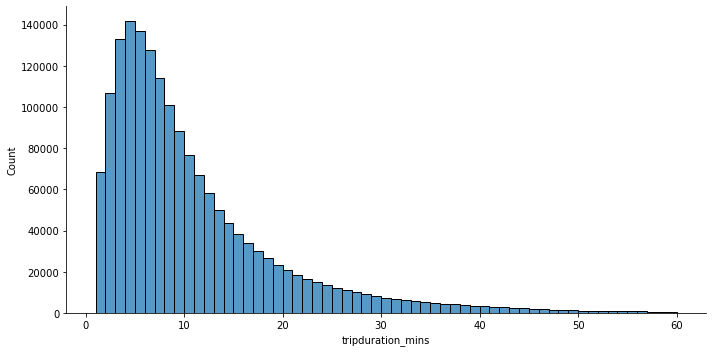

In [18]:
sns.displot(data=df,x="tripduration_mins" , bins=range(1,61) , aspect=10/5  ) ;

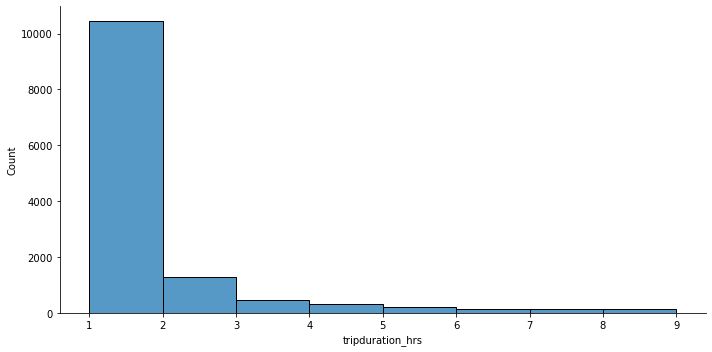

In [27]:
sns.displot(data=df,x="tripduration_hrs" , bins=range(1,10) , aspect=10/5  ) ;

In [19]:
df.to_csv('202302-citibike-tripdata_SBPrepared.csv')